# Исследование надежности заемщиков.

***Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.***

Заказчик — кредитный отдел банка. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import os

if os.path.exists('/datasets/data.csv'):
    df = pd.read_csv('/datasets/games.csv')
else:
    df = pd.read_csv('C:/Users/user/Documents/Проекты ЯП/Анализ платёжеспособности/data.csv')
#df = pd.read_csv('/datasets/data.csv') 

df.head() # Выводим на экран первые 15 строк таблицы:

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [2]:
df.info() # Получаем общую информацию о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


***Описание данных***

  В таблице 12 столбцов
  
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

Количество значений в столбцах различается. Столбцы days_employed и total_income имею пропуски значений.

### Шаг 2.1 Заполнение пропусков

In [3]:
df.isna().sum() #сколько в таблице пропущенных значений.

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Количество пропусков в столбцах days_employed и total_income одинаковое. 2174 пропуска из 21525 строк это почти 10%. Удаление такого количества строк может привести к икажению результатов анализа.

Цель анализа ответить на вопрос: влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок?
Из это следует, что наиболее важными для исследования данными являются данные столбцов: children, family_status, family_status_id и debt. Поэтому пропуски можно заменить.

Так как общий трудовой стаж в днях и ежемесячный доход это количественные переменные, то заменять пропуски стоит медианным значением. Среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства. 

Возможно, что пропуски связаны с тем, что в статистику попали клиенты которым было отказно в выдаче кредита.


In [4]:
# в столбце days_employed делаем положительные значения; 
# аномально высокие значения, предположив, что это часы переводим в дни с помощью цикла; 
# пропуски заменяем на медианные значения стажа для пенсионеров
df['days_employed'] = abs(df['days_employed'])
days_employed = df['days_employed']
days_employed_new = []
for value in days_employed:
        
        if value > 300000:
            days_employed_new.append(value / 24)
        else:
            days_employed_new.append(value)

df['days_employed'] = days_employed_new 
df['days_employed'] = df['days_employed'].fillna(value=df[df['income_type'] == 'пенсионер']['days_employed'].median())              
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [5]:
# пропуски в столбце total_income заменим медианными значениями для отдельно для каждой группы

df['total_income'] = df.apply(
    lambda x:
    df[df['income_type'] == x['income_type']]['total_income'].median()
    if pd.isnull(x['total_income']) else x['total_income'], 
    axis=1)

df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Шаг 2.2 Проверка данных на аномалии и исправления.

Проведём проверку данных на типы и наличие явных и скрытых дубликатов.
Для поиска явных дубликатов используем метод .duplicated() с подсчётом общего их числа .sum()
Не явные дубликаты ищем с помощью метода unique(). При изменение регистра применяем метод .str.lower()

In [6]:
df.info() # проверим данные по типу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
df.duplicated().sum() # количество явных дубликатов

54

Проверим на аномалии столбец **children**

В столбце обнаружились отрицательные значения. Возможно это человеческий фактор. Применим метод abs().
Ещё есть значение 20, что тоже похоже на ошибку ввода данных.

In [8]:
df['children'].sort_values().unique() # выявление не явных дубликато в столбце children

array([-1,  0,  1,  2,  3,  4,  5, 20], dtype=int64)

In [9]:
df['children'] = abs(df['children']) # приведение всех значений к положительному значению

In [10]:
df['children'] = df['children'].replace(20, 2) # меняем количество 20 на 2

In [11]:
df['children'].sort_values().unique() # проверяем, что получилось

array([0, 1, 2, 3, 4, 5], dtype=int64)

*Проверим содержимое всех остальных столбцов*

- dob_years - не требует корректировки
- education - значения записаны прописными с строчными буквами, нужно привести все записи к одному регистру. Так мы избавимся от дубликатов. Для этого применим метод str.lower(). 
- education_id - 5 значений соответствует количеству уникальных записей в столбце education
- family_status - не требует корректировки
- family_status_id - 5 значений соответствует количеству уникальных записей в столбце family_status
- gender - в результате выявилось значение 'XNA', что никак не может быть интерпритированно как пол клиента. Количество таких записей 1. Заменим его на 'F'.
- income_type - не требует корректировки
- debt - не требует корректировки
- total_income - ежемесячный доход - значения записаны в виде вещественного числа. Для большей наглядности переведём их в целочисленный вид. Используем метод abs(). 
- purpose - не содержит явных дубликатов, записи в одном регистре, но в дальнейшем можно создать категории и разбить значения по ним.


In [12]:
df['dob_years'].sort_values().unique() # выявление не явных дубликато в столбце dob_years

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75], dtype=int64)

In [13]:
df['education'].sort_values().unique() # выявление не явных дубликато в столбце education

array(['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее',
       'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное',
       'неоконченное высшее', 'среднее', 'ученая степень'], dtype=object)

In [14]:
df['education'] = df['education'].str.lower() # приведение значений столбца education к одному регистру
df['education'].sort_values().unique() # проверим

array(['высшее', 'начальное', 'неоконченное высшее', 'среднее',
       'ученая степень'], dtype=object)

In [15]:
df['education_id'].sort_values().unique() # выявление не явных дубликато в столбце education_id

array([0, 1, 2, 3, 4], dtype=int64)

In [16]:
df['family_status'].sort_values().unique() # выявление не явных дубликато в столбце family_status

array(['Не женат / не замужем', 'в разводе', 'вдовец / вдова',
       'гражданский брак', 'женат / замужем'], dtype=object)

In [17]:
df['family_status_id'].sort_values().unique() # выявление не явных дубликато в столбце family_status_id

array([0, 1, 2, 3, 4], dtype=int64)

In [18]:
df['gender'].sort_values().unique() # выявление не явных дубликато в столбце gender

array(['F', 'M', 'XNA'], dtype=object)

In [19]:
df['income_type'].sort_values().unique() # выявление не явных дубликато в столбце income_type

array(['безработный', 'в декрете', 'госслужащий', 'компаньон',
       'пенсионер', 'предприниматель', 'сотрудник', 'студент'],
      dtype=object)

In [20]:
df['debt'].sort_values().unique() # выявление не явных дубликато в столбце debt

array([0, 1], dtype=int64)

In [21]:
df['total_income'].sort_values().unique() # выявление не явных дубликато в столбце total_income

array([  20667.26379327,   21205.28056622,   21367.64835649, ...,
       1726276.01433167, 2200852.2102589 , 2265604.02872274])

In [22]:
df['purpose'].sort_values().unique() # выявление не явных дубликато в столбце purpose

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

### Шаг 2.3. Изменение типов данных.

Данные столбца total_income имеют тип float. Предположим, что это рубли, тогда логично будет перевести значения в целочисленный вид. Вероятно, что в банке данные о доходах хранятся в вещественном виде.

In [23]:
df['total_income'] = df['total_income'].astype('int') # приведим данные total_income к целому значению.
df.head(10) # проверим, что получилось

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи


### Шаг 2.4. Удаление дубликатов.

Для удаления явных дубликатов используем метод drop_duplicates(), а чтобы не было пропусков используем reset_index().

In [24]:
df = df.drop_duplicates().reset_index(drop=True) # удаление явных дубликатов (с удалением старых индексов и формированием новых)

In [25]:
df.duplicated().sum() # проверка на отсутствие дубликатов

0

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создадим два новых датафрейма со столбцами:

- education_id и education — в первом;
- family_status_id и family_status — во втором.

In [26]:
df_education = df[['education_id', 'education']] # новый датафрейм  - уровень образования 
df_family_status = df[['family_status_id', 'family_status']] # новый датафрейм  - семейное положение
print(df_education.columns.values)
print(df_family_status.columns.values) # проверим какие столбцы у нас в новых датафреймах

['education_id' 'education']
['family_status_id' 'family_status']


In [27]:
df = df.drop(['education', 'family_status'], axis=1) #Теперь из исходного датафрейма удалим столбцы 'education' и 'family_status'. 
print(df.columns.values) # проверим.

['children' 'days_employed' 'dob_years' 'education_id' 'family_status_id'
 'gender' 'income_type' 'debt' 'total_income' 'purpose']


### Шаг 2.6. Категоризация дохода.

Клиентов на основании их доходов можно разбить на категории:

- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

Напишем функцию, которая перебирёт значения столбца 'total_income' и присвоит категорию каждому клиенту исходя из условий.

In [28]:
def income_category(income):
    
    if income <= 30000:
        return 'E'
    if income > 30000 and income <= 50000:
        return 'D'
    if income > 50000 and income <= 200000:
        return 'C'
    if income > 200000 and income <= 1000000:
        return 'B'
    return 'A'

In [29]:
df['total_income_category'] = df['total_income'].apply(income_category)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,14177.753002,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Шаг 2.7. Категоризация целей кредита.

На основании данных столбца **purpose** создадим категории для целей кредитования.

- 'операции с автомобилем',
- 'операции с недвижимостью',
- 'проведение свадьбы',
- 'получение образования'



In [30]:
def purpose_credit(purpose):
    
    if 'свадьб' in purpose:
        return'проведение свадьбы'
            
    if 'автомобил' in purpose:
        return'операции с автомобилем'
            
    if 'образовани' in purpose:
        return'получение образования'
        
    return'операции с недвижимостью'

In [31]:
df['purpose_category'] = df['purpose'].apply(purpose_credit)
df.head()


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,14177.753002,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


### Ответы на вопросы.

##### Вопрос 1:
Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [32]:
df_children = df.pivot_table(index=['children'], columns='debt', values='total_income', aggfunc='count').reset_index() # создадим сводную таблицу
 
df_children = df_children.rename(columns=
{
    df_children.columns[1]: 'without_debt',
    df_children.columns[2]: 'with_debt'
}) # переименуем столбцы
df_children['with_debt'] =df_children['with_debt'].fillna(value=0) # для наглядности заменим NaN на 0
df_children['percent'] = ((df_children['with_debt'] / (df_children['without_debt'] + df_children['with_debt'])) * 100).round(2) # считаем % клиентов, которые имели задолженности по возврату кредита.
df_children 

debt,children,without_debt,with_debt,percent
0,0,13028.0,1063.0,7.54
1,1,4410.0,445.0,9.17
2,2,1926.0,202.0,9.49
3,3,303.0,27.0,8.18
4,4,37.0,4.0,9.76
5,5,9.0,0.0,0.00


<AxesSubplot:xlabel='children', ylabel='percent'>

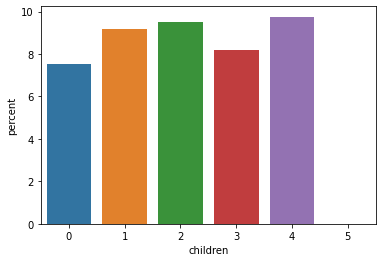

In [33]:
sns.barplot(x=df_children['children'], y=df_children['percent'])

##### Вывод 1:

Данные показывают: прямой зависимости от количества детей и процентом клиентов, которые имели задолженность по возврату кредитов нет. 
На графике это наглядно видно: от бездетных до имеющих 2 детей идёт рост, для 3 детей процент падает, для 4 снова рост (больше 1.5%) , а для 5 детей 0. 
 
Значит, данные не подтверждают первую гипотизу о зависимости между количеством детей и возвратом кредита в срок.

##### Вопрос 2:
Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [34]:
df_family_status_debt = df.pivot_table(index=['family_status_id'], columns='debt', values='total_income', aggfunc='count').reset_index() # создадим сводную таблицу
df_family_status_debt = df_family_status_debt.rename(columns=
{
    df_family_status_debt.columns[1]: 'without_debt',
    df_family_status_debt.columns[2]: 'with_debt'
}) # переименуем столбцы
df_family_status_debt['percent'] = ((df_family_status_debt['with_debt'] / (df_family_status_debt['without_debt'] + df_family_status_debt['with_debt'])) * 100).round(2) 
# считаем % клиентов, которые имели задолженности по возврату кредита.
df_family_status_debt

debt,family_status_id,without_debt,with_debt,percent
0,0,11408,931,7.55
1,1,3763,388,9.35
2,2,896,63,6.57
3,3,1110,85,7.11
4,4,2536,274,9.75


<AxesSubplot:xlabel='percent', ylabel='family_status'>

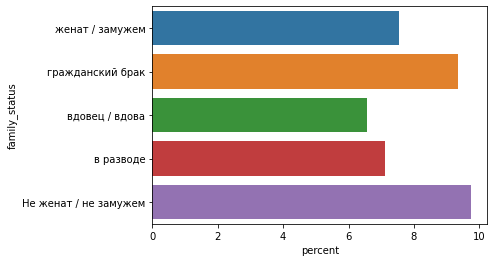

In [35]:
df_family_status_debt = df_family_status_debt.merge(df_family_status, on='family_status_id', how='left')
sns.barplot(x=df_family_status_debt['percent'], y=df_family_status_debt['family_status'])

Зависимость между семейным положением и возвратом кредита в срок существует.
На графике видно, что процент имевших задолженность по кредитам среди клиентов категории "Не женат/не замужем"  и "гражданский брак" сильно выше остальных категорий (по таблице это 9.75 и 9.35 соответственно), а категория "вдовец/вдова" имеет наименьший процент задолженников, при этом категории "женат/замужем" и "в разводе" близки по значению. Наимение обязательными в выполнении обязательст перед банком являются клиенты статуса "не женат/не замужем" и "гражданский брак".   

Значит, данные говорят в пользу зависимости между семейным положением и возвратом кредита в срок. 

##### Вопрос 3:
Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [36]:
df_total_income = df.pivot_table(index=['total_income_category'], columns='debt', values='purpose', aggfunc='count').reset_index() # создадим сводную таблицу
df_total_income = df_total_income.rename(columns=
{
    df_total_income.columns[1]: 'without_debt',
    df_total_income.columns[2]: 'with_debt'
}) # переименуем столбцы
df_total_income['percent'] = ((df_total_income['with_debt'] / (df_total_income['without_debt'] + df_total_income['with_debt'])) * 100).round(2) 
# считаем % клиентов, которые имели задолженности по возврату кредита.
df_total_income

debt,total_income_category,without_debt,with_debt,percent
0,A,23,2,8.00
1,B,4686,356,7.06
2,C,14655,1360,8.49
3,D,329,21,6.00
4,E,20,2,9.09


<AxesSubplot:xlabel='percent', ylabel='mean_category'>

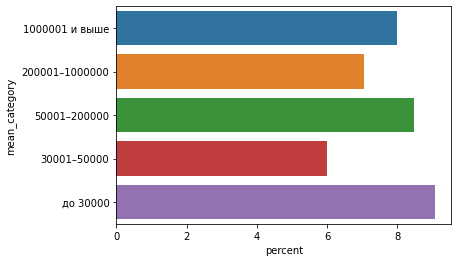

In [37]:
category = {                # для наглядности сделаем столбец с расшифровкой значений категорий A,B,C,D,E.
    'A': '1000001 и выше',
    'B': '200001–1000000',
    'C': '50001–200000',
    'D': '30001–50000',
    'E': 'до 30000'}
df_category = pd.DataFrame(list(category.items()),columns=['total_income_category', 'mean_category'])
df_total_income = df_total_income.merge(df_category, on='total_income_category', how='left')
sns.barplot(x=df_total_income['percent'], y=df_total_income['mean_category']) # построим столбчатую диаграмму.

Прямой зависимости между уровнем дохода и возвратом кредита в срок не прослеживается.
При этом можно утверждать, что при доходе меньше 30000 количество просрочек максимальное.
Меньше всего процент клиентов имевших задолженности по кредитам среди тех, чей доход в диапазоне 30001 до 50000.

Значит, зависимость между уровнем дохода и возвратом кредита в срок подтвердилась частично.

##### Вопрос 4:
Как разные цели кредита влияют на его возврат в срок?

In [38]:
df_purpose = df.pivot_table(index=['purpose_category'], columns='debt', values='purpose', aggfunc='count').reset_index() # создадим сводную таблицу
df_purpose = df_purpose.rename(columns=
{
    df_purpose.columns[1]: 'without_debt',
    df_purpose.columns[2]: 'with_debt'
}) # переименуем столбцы
df_purpose['percent'] = ((df_purpose['with_debt'] / (df_purpose['without_debt'] + df_purpose['with_debt'])) * 100).round(2) 
# считаем % клиентов, которые имели задолженности по возврату кредита.
df_purpose

debt,purpose_category,without_debt,with_debt,percent
0,операции с автомобилем,3903,403,9.36
1,операции с недвижимостью,10029,782,7.23
2,получение образования,3643,370,9.22
3,проведение свадьбы,2138,186,8.00


<AxesSubplot:xlabel='percent', ylabel='purpose_category'>

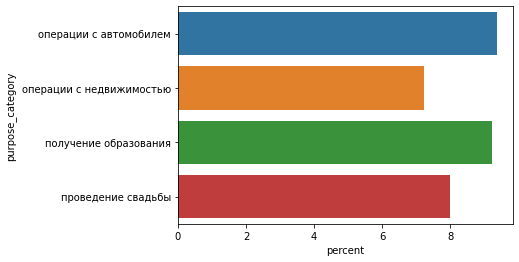

In [39]:
sns.barplot(x=df_purpose['percent'], y=df_purpose['purpose_category'])

Самые дисциплинированные в погашении кредита оказались заёмщики, целью которых были операции с недвижимостью - 7.23%, при этом количество таковых в выборке максимальное, что говорит о надёжности результата. 
Проведение свадьбы оказалось на втором месте - 8.0%.
В равной степени большой процент имевших задолженность это те, целью кредита которых были операции с автомобилем - 9.36% и полученние образования - 9.22%.
Значит, разные цели кредита влияют на его возврат в срок.    

## Общий вывод:

В данном исследовании на надёжность клиентов мы ответили на 4 вопроса.

*Есть ли зависимость между количеством детей и возвратом кредита в срок?*
Проанализировав данные можно сказать, что такой зависимости нет

*Есть ли зависимость между семейным положением и возвратом кредита в срок?*
Данные говорят в пользу зависимости между семейным положением и возвратом кредита в срок.
Список по убыванию надежности будет такой:
- вдовец/вдова,
- в разводе,
- женат/замужем,
- гражданский брак,
- Не женат/не замужем

*Есть ли зависимость между уровнем дохода и возвратом кредита в срок?*
Прямой зависимости между уровнем дохода и возвратом кредита в срок не прослеживается. Но можно сказать, что при доходе меньше 30000 количество задержек в погашении кредита будет максимальное, а для клиентов с доходом от 30001 до 50000 характерна высокая способность погасить кредит вовремя.

*Как разные цели кредита влияют на его возврат в срок*
Зависимость от целей кредитования и способность заёмщиков погашать его в срок по убыванию выглядит так:
- операции с недвижимостью,
- проведение свадьбы,
- полученние образования,
- операции с автомобилем.

Исходя из всего вышеизложенного, можно сделать вывод, что характеристики потенциального заёмщика наиболее способного вернуть кредит банку: 
- Семейное положение - вдовец/вдова 
- Доход - 30001-50000
- Цель кредита - операции с недвижимостью

А характеристики потенциального заёмщика наименее способного вернуть вовремя кредит:

- Семейное положение - не женат/не замужем 
- Доход -  до 30000
- Цель кредита - операции с автомобилем